In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

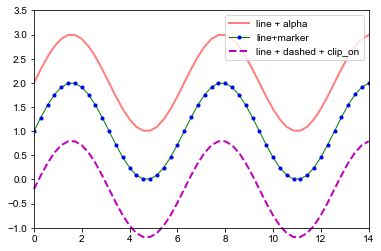

In [26]:
x=np.linspace(0,14,50)
y=np.sin(x)

plt.figure()
ax=plt.gca()
ax.set_xlim(0,14)
ax.set_ylim(-1,3.5)
# 1
ax.plot(x,y+2, color='r',alpha=0.5, label='line + alpha',linewidth=2)

ax.plot(x,y+1, color='g', label='line+marker',lw=1, 
        marker='o', markersize=4,markerfacecolor='b',markeredgewidth=0.1)
ax.plot(x,y-0.2, color='m', ls='dashed',label='line + dashed + clip_on',clip_on=False,lw=2)

ax.legend()

plt.show()

### 基础案例

In [33]:
datapath='data/Wang2020/'
data=pd.read_excel(datapath+'41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 3i')
# print(data.keys)

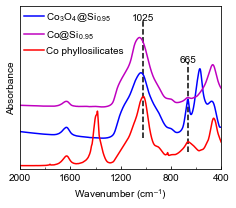

In [70]:
def plotfig3(ax,xname,yname,lc, label, movey=0.2):
    x=data[xname]
    y=data[yname]
    ax.plot(x,y+movey, color=lc, label=label)

plt.figure(figsize=(3.6, 3))
ax=plt.gca()


# 2
plotfig3(ax,'Wavenumber(cm-1).1','Absorbance.1','b',label='Co$_\mathregular{3}$O$_\mathregular{4}$@Si$_{\mathregular{0.95}}$',movey=0.4)

# 3
plotfig3(ax,'Wavenumber(cm-1).2','Absorbance.2','m',label='Co@Si$_{\mathregular{0.95}}$',movey=0.85)
# 1
plotfig3(ax,'Wavenumber(cm-1)','Absorbance','r',label='Co phyllosilicates',movey=0)

ax.legend(frameon=False,handletextpad=0.2,borderaxespad=0)
# text
ax.vlines(x=1025, ymin=0.4, ymax=2.1,ls='dashed')
ax.text(1025, 2.1, '1025', ha='center')
ax.vlines(x=665, ymin=0.2, ymax=1.5,ls='dashed')
ax.text(665, 1.5, '665', ha='center')

ax.set_xlim(2000,400)
ax.set_ylim(-0.05, 2.3)
ax.yaxis.set_ticks([])
ax.set_xlabel('Wavenumber (cm$^{\mathregular{–1}}$)')
ax.set_ylabel('Absorbance')
ax.tick_params(axis='x',which='both', direction='in')
ax.xaxis.set_major_locator(MultipleLocator(400))
ax.xaxis.set_minor_locator(MultipleLocator(200))

plt.show()

### 进阶案例

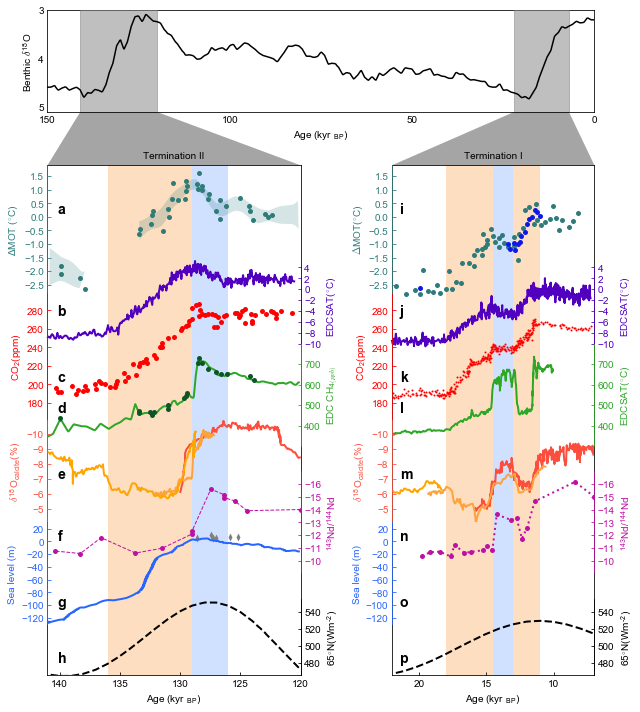

In [301]:
# 1. 总体布局
fig, axs=plt.subplots(2,2, sharex=False, sharey=False, 
                      gridspec_kw={'width_ratios':[1,0.8],'height_ratios':[0.2,1]},figsize=(9,10))
# 2. 合并第一行坐标轴
gs=axs[0][0].get_gridspec()
axbig=fig.add_subplot(gs[0,:])
axs[0][0].remove()
axs[0][1].remove()
ax_II=axs[1][0]
ax_I=axs[1][1]

# 3 plot O18
data=pd.read_csv('data/Shackleton2020/fig3_1.csv')
x=data.values[:,0]
y=data.values[:,1]
ax=axbig
ax.plot(x,y,color='k', zorder=10)
ax.set_xlim(150, 0)
ax.set_ylim(5.1,3)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.tick_params(axis='both',which='both', length=0)
ax.set_xlabel('Age (kyr $_{\mathregular{BP}}$)')
ax.set_ylabel('Benthic $\delta ^{\mathregular{18}}$O')

# 4
xlims_II=(141, 120)
xlims_I=(22, 7)
ylims=ax.get_ylim()
ax_II.set_xlim(xlims_II)
ax_II.set_ylim(ylims)
ax_I.set_xlim(xlims_I)
ax_I.set_ylim(ylims)
ax_II.yaxis.set_ticks([])
ax_II.xaxis.set_major_locator(MultipleLocator(5))
ax_II.tick_params(axis='x',which='both', direction='in')
ax_I.yaxis.set_ticks([])
ax_I.xaxis.set_major_locator(MultipleLocator(5))
ax_I.tick_params(axis='x',which='both', direction='in')
ax_II.set_xlabel('Age (kyr $_{\mathregular{BP}}$)')
ax_I.set_xlabel('Age (kyr $_{\mathregular{BP}}$)')

def addsubplots(ax_par, y1, y2, pos_labels,ylims,major_locator,ylabel='',color='r',csv='',lw=2,marker='o',mfc='',ms=5,
                datapath='data/Shackleton2020',plotaxis=True,which='',clip_on=True,ls='-'):
    
    if(plotaxis==True):
        ax=ax_par.inset_axes([0, y1, 1, y2-y1], transform=ax_par.transAxes)
        ax.tick_params(axis='y',which='both', direction='in', color=color, labelcolor=color)
        ax.xaxis.set_ticks([])
        ax.set_facecolor('none')
        ax.set_ylabel(ylabel, color=color)
        ax.yaxis.set_label_position(pos_labels)
        ax.yaxis.set_ticks_position(pos_labels)
        ax.set_ylim(ylims)
        ax.yaxis.set_major_locator(MultipleLocator(major_locator))
        ax.set_xlim(ax_par.get_xlim())
        # 
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines[pos_labels].set_visible(True)
        ax.spines[pos_labels].set_color(color)
    else:
        ax=ax_par
    # 
    data=pd.read_csv(datapath+'/'+csv)
    x=data.values[:,0]
    y=data.values[:,1]
    ind=((x>=np.min(ax_par.get_xlim())) & (x<=np.max(ax_par.get_xlim())))
    x=x[ind]
    y=y[ind]
    if(mfc==''):
        mfc=color
    ax.plot(x,y,color=color,linestyle=ls,marker=marker,markerfacecolor=mfc,markersize=ms,lw=lw,markeredgecolor='none',clip_on=clip_on)
    if(which=='a'):
        data=pd.read_csv(datapath+'/a2.csv')
        x1=data.values[:,0]
        y1=data.values[:,1]
        data=pd.read_csv(datapath+'/a3.csv')
        x2=data.values[:,0]
        y2=data.values[:,1]
        coords=np.column_stack((np.append(x1,x2), np.append(y1,y2)))
        polygon=plt.Polygon(coords,fc=color, ec='none',alpha=0.2)
        ax.add_artist(polygon)
        data=pd.read_csv(datapath+'/a4.csv')
        x1=data.values[:,0]
        y1=data.values[:,1]
        data=pd.read_csv(datapath+'/a5.csv')
        x2=data.values[:,0]
        y2=data.values[:,1]
        coords=np.column_stack((np.append(x1,x2), np.append(y1,y2)))
        polygon=plt.Polygon(coords,fc=color, ec='none',alpha=0.2)
        ax.add_artist(polygon)
    return ax, x, y
# 5, a
addsubplots(ax_II, 0.75, 1,'left',(-2.8, 1.9),0.5, 
            color=(46/255,123/255,122/255),ylabel='ΔMOT ($^{\circ}$C)',csv='a1.csv',lw=0,which='a')

# b
addsubplots(ax_II, 0.65, 0.8,'right',(-10, 4),2, 
            color=(81/255,0/255,191/255),ylabel='EDCSAT($^{\circ}$C)',csv='b.csv',marker='',clip_on=False)

# c
addsubplots(ax_II, 0.5, 0.75,'left',(161, 299),20, 
            color=(255/255,0/255,0/255),ylabel='CO$_{\mathregular{2}}$(ppm)',csv='c.csv',lw=0)

# d
axd,x,y=addsubplots(ax_II, 0.45, 0.65,'right',(301, 799),100, 
            color=(46/255,167/255,39/255),ylabel='EDC CH$_{\mathregular{4}(ppb)}$',csv='d2.csv',marker='',clip_on=False)
addsubplots(axd, 0.45, 0.65,'right',(301, 799),100, 
            color=(11/255,85/255,38/255),ylabel='EDC CH$_{\mathregular{4}(ppb)}$',csv='d1.csv',marker='o', lw=0,clip_on=False, plotaxis=False)
# e
axe,x,y=addsubplots(ax_II,0.3,0.5,'left',(-4.1, -10.9),1,'$\delta ^{\mathregular{18}}$O$_{\mathregular{calcite}}$(%)',(252/255,77/255,61/255),
                      'e3.csv',marker='',lw=2)
addsubplots(axe,0.35,0.55,'left',(-4.1, -10.9),1,color=(253/255,163/255,61/255),
                      csv='e2.csv',marker='',plotaxis=False,lw=2)
addsubplots(axe,0.35,0.55,'left',(-4.1, -10.9),1,color='orange',
                      csv='e1.csv',marker='',plotaxis=False,lw=2)
# f
addsubplots(ax_II, 0.2, 0.4,'right',(-9.01, -16.99),1, 
            color=(189/255,17/255,163/255),ls='dashed',lw=1,ylabel='$^{\mathregular{143}}$Nd/$^{\mathregular{144}}$Nd',csv='f.csv')
# g
axg,x,y=addsubplots(ax_II,0.1,0.3,'left',(-130,30),20,'Sea level (m)',(40/255,101/255,255/255),
                      'g1.csv',marker='+',lw=0)
addsubplots(axg,0.1,0.3,'left',(-130,30),20,'Sea level (m)','gray',
                      'g2.csv',marker='d',lw=0,plotaxis=False)
addsubplots(axg,0.1,0.3,'left',(-130,30),20,'Sea level (m)',(40/255,101/255,255/255),
                      'g3.csv',marker='',plotaxis=False)
# h
axd,x,y=addsubplots(ax_II,0,0.15,'right',(465,555),20,'65$^{\circ}$N(Wm$^{\mathregular{-2}}$)','k',
                      'h.csv',ls='dashed',marker='',lw=2)

# ----------termination I
# i
axa,x1,y1=addsubplots(ax_I,0.75,1,'left',(-2.8,1.9),0.5,'$\Delta$MOT($^{\circ}$C)',(46/255,123/255,122/255),
                      'i1.csv',lw=0,clip_on=False)
addsubplots(axa,0.75,1,'left',(-2.8,1.9),0.5,'$\Delta$MOT($^{\circ}$C)',(14/255,24/255,230/255),
                      'i2.csv',lw=0,plotaxis=False)
# j
addsubplots(ax_I,0.65,0.8,'right',(-10,4),2,'EDCSAT($^{\circ}$C)',(81/255,0/255,191/255),
                      'j.csv',marker='',clip_on=False)
# k
addsubplots(ax_I,0.5,0.75,'left',(161,299),20,'CO$_{\mathregular{2}}$(ppm)',(255/255,0/255,0/255),
                      'k.csv',lw=0,ms=2)
# l
axl,x,y=addsubplots(ax_I,0.45,0.65,'right',(301,799),100,'EDCSAT($^{\circ}$C)',(46/255,167/255,39/255),
                      'l.csv',marker='')
addsubplots(axl,0.5,0.7,'right',(301,799),100,'EDCSAT($^{\circ}$C)',(11/255,85/255,38/255),
                      'l2.csv',lw=0,plotaxis=False,marker='+')
# m
axm,x,y=addsubplots(ax_I,0.3,0.5,'left',(-4.1, -10.9),1,'$\delta ^{\mathregular{18}}$O$_{\mathregular{calcite}}$(%)',(252/255,77/255,61/255),
                      'm3.csv',marker='',lw=2)
addsubplots(axm,0.35,0.55,'left',(-4.1, -10.9),1,color=(253/255,163/255,61/255),
                      csv='m2.csv',marker='',plotaxis=False,lw=2)
addsubplots(axm,0.35,0.55,'left',(-4.1, -10.9),1,color='orange',
                      csv='m1.csv',marker='',plotaxis=False,lw=2)
# n
axd,x,y=addsubplots(ax_I,0.2,0.4,'right',(-9.01,-16.99),1,'$^{\mathregular{143}}$Nd/$^{\mathregular{144}}$Nd',(189/255,17/255,163/255),
                      'n.csv',ls='dotted')
# o
axe,x,y=addsubplots(ax_I,0.1,0.3,'left',(-130,30),20,'Sea level (m)',(40/255,101/255,255/255),
                      'o.csv',marker='+',lw=0,clip_on=False)
# p
axd,x,y=addsubplots(ax_I,0,0.15,'right',(465,555),20,'65$^{\circ}$N(Wm$^{\mathregular{-2}}$)','k',
                      'p.csv',ls='dashed',marker='',lw=2)

# 标注文字+填充区域
ax_II.axvspan(136, 129, facecolor=(254/255,222/255,192/255))
ax_II.axvspan(129, 126, facecolor=(207/255,225/255,255/255))
ax_I.axvspan(18, 11, facecolor=(254/255,222/255,192/255))
ax_I.axvspan(14.5, 13, facecolor=(207/255,225/255,255/255))
ax_II.text(0.5, 1.01, 'Termination II', transform=ax_II.transAxes,ha='center', va='bottom')
ax_I.text(0.5, 1.01, 'Termination I', transform=ax_I.transAxes,ha='center', va='bottom')
x0=0.04
kawrgs=dict(ha='left', va='bottom', fontweight='bold', fontsize=14)
ys=[0.9, 0.7, 0.57, 0.51, 0.38, 0.26, 0.13, 0.02]
labels_II=['a','b','c','d','e','f','g','h']
labels_I=['i','j','k','l','m','n','o','p']
for y0, label_II, label_I in zip(ys, labels_II,labels_I):
    ax_II.text(x0, y0, label_II, transform=ax_II.transAxes, **kawrgs)
    ax_I.text(x0, y0, label_I, transform=ax_I.transAxes, **kawrgs)

plt.tight_layout()

# 局部放大指示框
def addzommindicate(ax, ax_zoom, xlims, ylims, fc='gray', alpha1=0.5, alpha2=0.7):
    recpatch, connects=ax.indicate_inset_zoom(ax_zoom, fc=fc, alpha=alpha1)
    for con in connects:
        con.set_visible(False)
    cons=[]
    for j in range(2):
        xyA=(xlims[j], ylims[1])
        xyB=(xlims[j], ylims[0])
        connect=mpatches.ConnectionPatch(xyA, xyB, 'data', 'data',axesA=ax_zoom, axesB=ax, edgecolor='none')
        ax_zoom.add_patch(connect)
        cons.append(connect)
    line2=cons[0].get_path().vertices
    line1=cons[1].get_path().vertices
    zoomcoords=sorted(np.concatenate((line1, line2)), key=lambda x: x[0])
    polygon_zoom=plt.Polygon(zoomcoords, facecolor='gray', alpha=alpha2, clip_on=False)
    ax_zoom.add_artist(polygon_zoom)
addzommindicate(axbig, ax_II, xlims_II, ylims)
addzommindicate(axbig, ax_I, xlims_I, ylims)
    
    
plt.show()